In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
print("Tensorflow version", tf.__version__)

Tensorflow version 2.12.0


In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/ 255.0, x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


This image is of number2



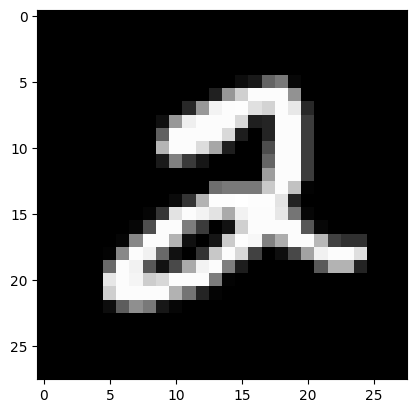

In [4]:
img_no=5

print(f"This image is of number{y_train[img_no]}\n")
plt.imshow(x_train[img_no], "gray")
plt.show()

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [6]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.35534978, -0.00981674,  0.25065082,  0.15623398, -0.50862795,
        -0.47194466, -0.12405653,  0.09942395, -0.665756  ,  0.3666243 ]],
      dtype=float32)

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.07524861, 0.10630693, 0.13793713, 0.12550946, 0.0645551 ,
        0.06696717, 0.09483046, 0.11857802, 0.05516844, 0.15489872]],
      dtype=float32)

In [8]:
loss_fn  = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [9]:
model.compile(optimizer ='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2949 - accuracy: 0.9146
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1426 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1067 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0859 - accuracy: 0.9730
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0729 - accuracy: 0.9777


In [11]:
model.evaluate(
    x_test, y_test, verbose = 2
)

313/313 - 1s - loss: 0.0745 - accuracy: 0.9782 - 705ms/epoch - 2ms/step


[0.0744619220495224, 0.9782000184059143]

In [12]:
prediction_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

Predicted number:7



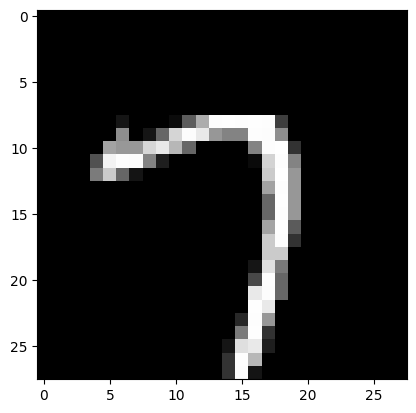

In [13]:
test_img = x_test[26]

probs = prediction_model(test_img[None,...])
prediction = tf.math.argmax(probs[0])

print(f"Predicted number:{prediction}\n")
plt.imshow(test_img,"gray")
plt.show()